Q1: Create a notebook which clearly demonstrates the basic concepts and hands-on of Logistic, Log-Logistic, Logit-Normal distributions along with the logit function.

### Logistic

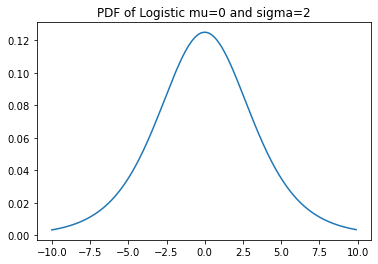

In [10]:
from scipy.stats import logistic
import matplotlib.pyplot as plt
import numpy as np

#creating a array of values between
#-10 to 10 with a difference of 0.1
x = np.arange(-10, 10, 0.1)
   
#creating a logistic distribution with mu = 0 and sigma =2
y = logistic.pdf(x, 0, 2)
   
plt.plot(x, y) 
plt.title('PDF of Logistic mu=0 and sigma=2')
plt.show()

#Logistic is similar to normal with just a bit heavier at the tail

Logistic cdf

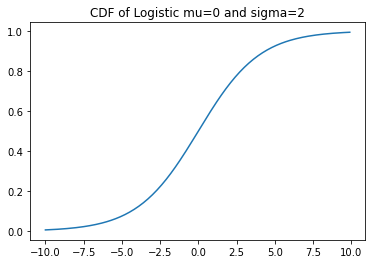

In [9]:
#creating a array of values between
#-10 to 10 with a difference of 0.1
x = np.arange(-10, 10, 0.1)
   
y = logistic.cdf(x, 0, 2)
plt.title('CDF of Logistic mu=0 and sigma=2')  
plt.plot(x, y)

plt.show()

Logistic ppf

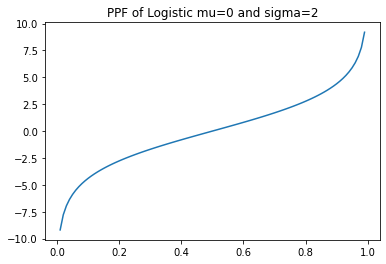

In [11]:
#creating a array of probability from inverse of pdf given a probability what is the value of x 
#0 to 1 with a difference of 0.01
x = np.arange(0, 1, 0.01)
   
y = logistic.ppf(x, 0, 2)
plt.title('PPF of Logistic mu=0 and sigma=2')     
plt.plot(x, y) 
plt.show()

### Log-Logistic

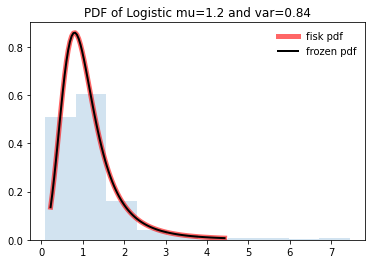

In [21]:
from scipy.stats import fisk
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1)
c = 3.09
mean, var, skew, kurt = fisk.stats(c, moments='mvsk')
x = np.linspace(fisk.ppf(0.01, c),
                fisk.ppf(0.99, c), 100)
ax.plot(x, fisk.pdf(x, c),'r-', lw=5, alpha=0.6, label='fisk pdf')
rv = fisk(c)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
r = fisk.rvs(c, size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.title('PDF of Logistic mu='+str(mean.round(2))+' and '+ 'var='+str(var.round(2)) )
plt.show()

### Logit_Normal

<ipython-input-22-a808a3d44375>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


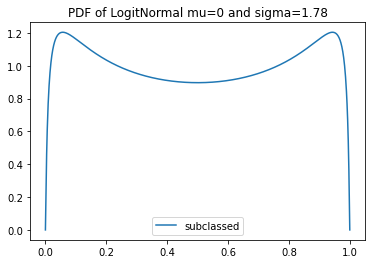

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import logit
from scipy.stats import norm, rv_continuous


class LogitNormal(rv_continuous):
    def __init__(self, scale=1, loc=0):
        super().__init__(self)
        self.scale = scale
        self.loc = loc

    def _pdf(self, x):
        return norm.pdf(logit(x), loc=self.loc, scale=self.scale)/(x*(1-x))


fig, ax = plt.subplots()
values = np.linspace(10e-10, 1-10e-10, 1000)
sigma, mu = 1.78, 0
ax.plot(
    values, LogitNormal(scale=sigma, loc=mu).pdf(values), label='subclassed'
)
plt.title('PDF of LogitNormal mu='+str(mu)+' and '+ 'sigma='+str(sigma ))
ax.legend()
fig.show()

### Logit Function

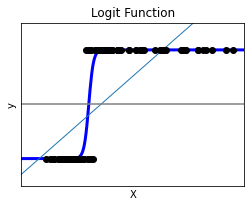

In [25]:

# Code source: Gael Varoqueux
# License: BSD

import numpy as np
import pylab as pl

from sklearn import linear_model

# this is our test set, it's just a straight line with some
# gaussian noise
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X>0] *= 4
X += .3*np.random.normal(size=n_samples)

X = X[:, np.newaxis]
# run the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
pl.figure(1, figsize=(4, 3))
pl.clf()
pl.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)
def model(x):
    return 1/(1+np.exp(-x))
loss = model(X_test*clf.coef_ + clf.intercept_).ravel()
pl.plot(X_test, loss, color='blue', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
pl.plot(X_test, ols.coef_*X_test + ols.intercept_, linewidth=1)
pl.axhline(.5, color='.5')

pl.ylabel('y')
pl.xlabel('X')
pl.title('Logit Function')
pl.xticks(())
pl.yticks(())
pl.ylim(-.25, 1.25)
pl.xlim(-4, 10)

pl.show()

##This is the logit function classifies values into 0 or 1